# Hackathon Hackers Website Analysis

## Load urls and names

In [1]:
entries = list()
with open('hackathon_hacker_sites.csv','r') as f:
    lines = f.read().split('\n')
    for line in lines:
        if len(line.split()) == 0:
            continue
        split = line.split(" ")
        entries.append([" ".join(split[:-1]), split[-1]])
print "{0} entries loaded.".format(len(entries))

464 entries loaded.


## Check all URLs

In [2]:
import urllib2
from IPython.display import display, clear_output

success = list()
fail = list()

for entry in entries:
    url = entry[1]
    if not url.startswith("http"):
        url = "http://" + url
    try:
        response = urllib2.urlopen(url, timeout=5)
        html = response.read()
        html = html.lower()
        success.append(entry + [len(html),
                                'bootstrap' in html,
                                'jquery' in html,
                                'resume' in html or 'cv' in html,
                                'twitter' in html])
        print success[-1]
    except Exception as e:
        fail.append(entry)
    clear_output(wait=True)
    print "{0} successful, {1} failed of {2} total.".format(len(success), len(fail), len(entries))
    print str(100*float(len(success)+len(fail))/len(entries))[:4] + "% done."

349 successful, 115 failed of 464 total.
100.% done.


## Analysis

Of the HH sites: 75.2% successful, 24.7% failed.


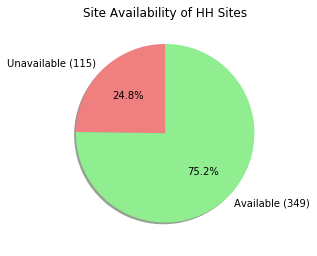

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


success_percent = 100*float(len(success))/len(entries)
fail_percent = 100*float(len(fail))/len(entries)
print "Of the HH sites: {0}% successful, {1}% failed.".format(str(success_percent)[:4], str(fail_percent)[:4])
pd.Series([len(fail),len(success)]).plot(kind='pie', 
                                         shadow=True,
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         explode=(0,0),
                                         colors=['lightcoral','lightgreen'],
                                         labels=['Unavailable ({0})'.format(len(fail))
                                                 ,'Available ({0})'.format(len(success))])
ax = plt.subplot(111)
ax.set_aspect('equal')
ax.set_title('Site Availability of HH Sites')
ax.set_ylabel('')
plt.savefig('availability.png',dpi=150)
plt.show()
plt.show()

### Website Size
(Simple HTML length analysis)

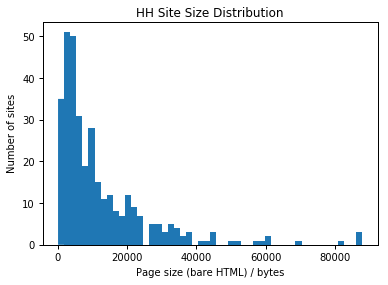

In [39]:

sizes = np.array([x[2] for x in success])
sizes = sizes[sizes < 100000]
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("HH Site Size Distribution")
plt.xlabel("Page size (bare HTML) / bytes")
plt.ylabel("Number of sites")
plt.hist(sizes, bins = 50)
plt.savefig('site_size_dist.png',dpi=150)
plt.show()


### Top Level Domains

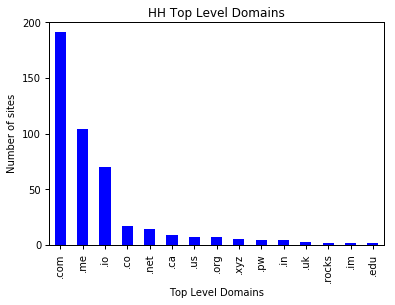

In [40]:
import collections
# Extract URLs from entries
urls = [x[1] for x in entries]
# Take only the top level domain on
tlds = ["." + x.split('.')[-1] for x in urls]
# Remove anything after & including the '/' after the TLD if it exists
tlds = [x.split('/')[0] if '/' in x else x for x in tlds]

vc = pd.Series(tlds).value_counts()
vc = vc[vc > 1]
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title("HH Top Level Domains")
plt.xlabel('Top Level Domains')
plt.ylabel('Number of sites')
vc.plot(kind='bar')
plt.savefig('tlds.png',dpi=150)
plt.show()

In [41]:
x = next(x for x in success if x[0] == "Ben Congdon")
print x
print

['Ben Congdon', 'http://benjamincongdon.me/', 6988, True, True, True, True]



### Min/Max on Site Size

In [42]:
data = pd.DataFrame(success)
data.columns = ['name','url','size','bootstrap','jQuery','resume','twitter']
print "Max size:"
print data.loc[data['size'].idxmax(),:]
print "\nMin size:"
print data.loc[data['size'].idxmin(),:]

Max size:
name                   Clayton Brand
url          http://claytonbrand.com
size                          513873
bootstrap                      False
jQuery                         False
resume                         False
twitter                         True
Name: 91, dtype: object

Min size:
name                   Caroline Hermans
url          http://carolinehermans.com
size                                131
bootstrap                         False
jQuery                            False
resume                            False
twitter                           False
Name: 77, dtype: object


### Length of URLs

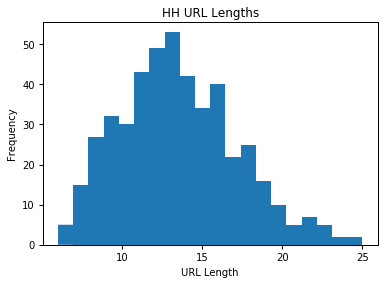

In [43]:
bare_urls = list()
for url in urls:
    stripped_url = url
    if stripped_url.startswith('http'):
        stripped_url = stripped_url.split('//')[1]
    if stripped_url.startswith('www.'):
        stripped_url = stripped_url.split('www.')[1]
    if '/' in stripped_url:
        stripped_url = stripped_url.split('/')[0]
    bare_urls.append(stripped_url)
url_lengths = [len(x) for x in bare_urls]
url_len_series = pd.Series(url_lengths)
url_df = pd.DataFrame(zip(bare_urls, url_lengths), columns=['url','len'])

ax = plt.subplot(111)
ax.set_title("HH URL Lengths")
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('URL Length')
url_len_series.plot(kind='hist', bins=20)
plt.savefig('url_lens.png',dpi=150)
plt.show()

### Min/Max/Median on URL Length

In [44]:
print "URL's with minimum length:"
print url_df[url_df['len'] == url_df['len'].min()]['url']
print "\nURL's with median length:"
print url_df[url_df['len'] == url_df['len'].median()]['url'][:5]
print "\nURL's with maximum length:"
print url_df[url_df['len'] == url_df['len'].max()]['url']

URL's with minimum length:
191    ian.sh
193    ian.pw
333    pkm.me
455    yef.im
457    zfo.gg
Name: url, dtype: object

URL's with median length:
4     abhiseshan.me
6     chrismatic.io
13    adriangaw.com
16    aicecream.com
20    yarabarla.com
Name: url, dtype: object

URL's with maximum length:
109    christinaplatt.weebly.com
362    rodrigoargumedo.github.io
Name: url, dtype: object


In [50]:
from scipy import stats
med = url_df['len'].quantile(0.5)
my_url = 'benjamincongdon.me'
print my_url + "is {0} characters long".format(len(my_url))
print "'{0}' is in the ".format(my_url) + str(stats.percentileofscore(url_df['len'],len(my_url)))[:4] + "th percentile"

benjamincongdon.meis 18 characters long
'benjamincongdon.me' is in the 87.2th percentile


### Bootstrap Use

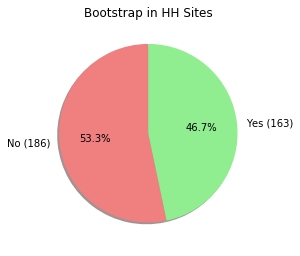

In [46]:
ax = plt.subplot(111)
data['bootstrap'].value_counts().plot(kind='pie', 
                                      shadow=True,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=(0,0),
                                      colors=['lightcoral','lightgreen'],
                                      labels=['No ({0})'.format(data['bootstrap'].value_counts()[False]),
                                              'Yes ({0})'.format(data['bootstrap'].value_counts()[True])])
ax.set_aspect('equal')
ax.set_title('Bootstrap in HH Sites')
ax.set_ylabel('')
plt.savefig('bootstrap.png',dpi=150)
plt.show()

### jQuery Use

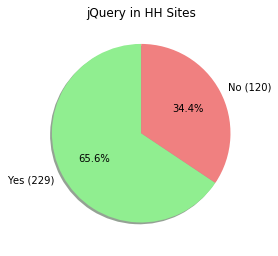

In [47]:
ax = plt.subplot(111)
data['jQuery'].value_counts().plot(kind='pie', 
                                   shadow=True,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=(0,0),
                                   colors=['lightgreen','lightcoral'],
                                   labels=['Yes ({0})'.format(data['jQuery'].value_counts()[True]),
                                           'No ({0})'.format(data['jQuery'].value_counts()[False])])
ax.set_aspect('equal')
ax.set_title('jQuery in HH Sites')
ax.set_ylabel('')
plt.savefig('jquery.png',dpi=150)
plt.show()

### 'Resume' or 'CV' in Site

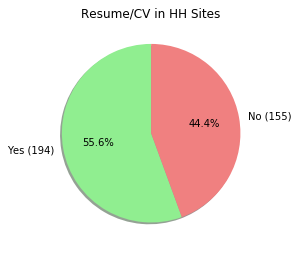

In [48]:
ax = plt.subplot(111)
data['resume'].value_counts().plot(kind='pie', 
                                   shadow=True,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=(0,0),
                                   colors=['lightgreen','lightcoral'],
                                   labels=['Yes ({0})'.format(data['resume'].value_counts()[True]),
                                           'No ({0})'.format(data['resume'].value_counts()[False])])
ax.set_aspect('equal')
ax.set_title('Resume/CV in HH Sites')
ax.set_ylabel('')
plt.savefig('resume.png',dpi=150)
plt.show()

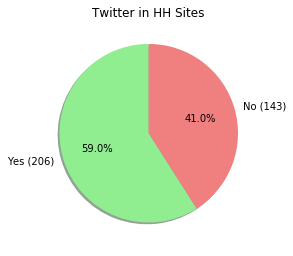

In [49]:
ax = plt.subplot(111)
data['twitter'].value_counts().plot(kind='pie', 
                                   shadow=True,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=(0,0),
                                   colors=['lightgreen','lightcoral'],
                                   labels=['Yes ({0})'.format(data['twitter'].value_counts()[True]),
                                           'No ({0})'.format(data['twitter'].value_counts()[False])])
ax.set_aspect('equal')
ax.set_title('Twitter in HH Sites')
ax.set_ylabel('')
plt.savefig('twitter.png',dpi=150)
plt.show()